# Практическая работа №2 (5). Предварительная обработка и разведочный анализ данных

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Задание 1

### <center> 1. Инициализация распределении

In [40]:
normal_distribution = np.random.normal(size=1000)
exponential_distribution = np.random.exponential(size=1000)
uniform_distribution = np.random.uniform(size=1000)
poisson_distribution = np.random.poisson(size=1000)

distributions = {
    'normal': normal_distribution,
    'exponential':exponential_distribution,
    'uniform': uniform_distribution,
    'poisson': poisson_distribution
}


### <center> 2. Визуализация данных

### <center> 2.1 Гистограмма до преобразования

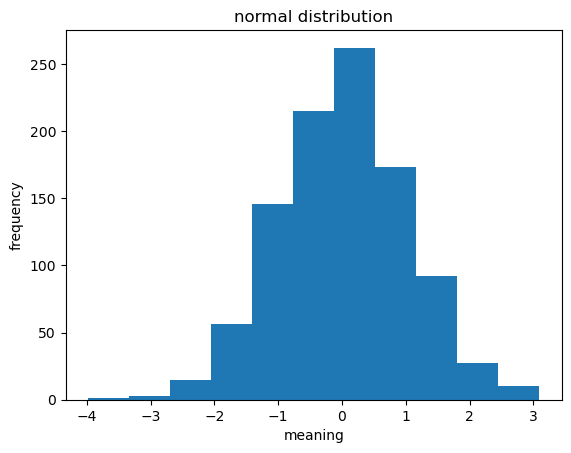

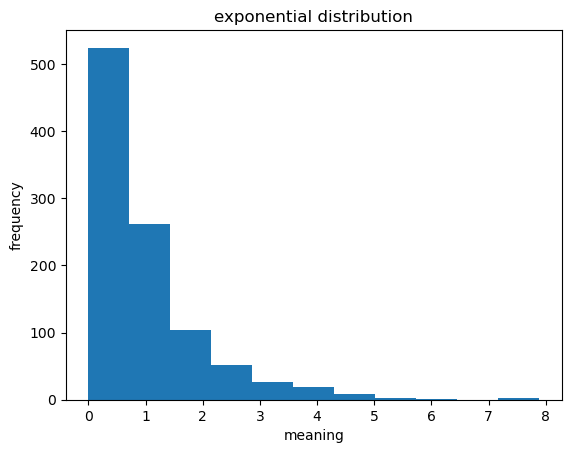

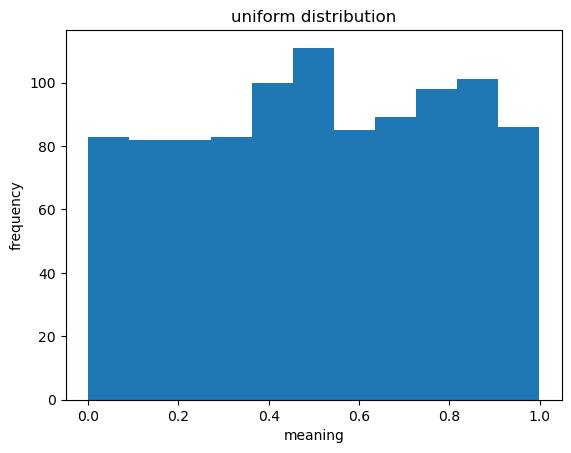

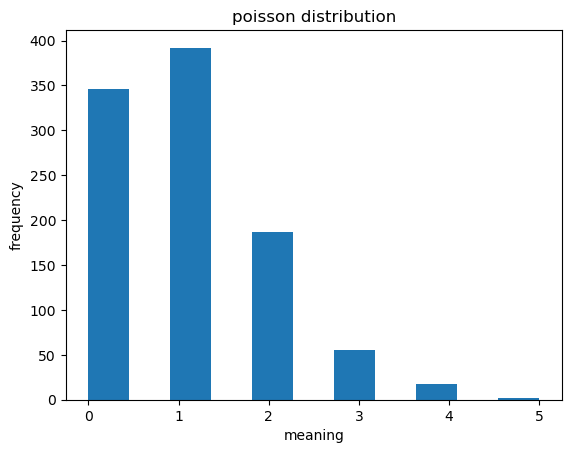

In [41]:
# Считаем количество столбцов в гистограмме по правилу Стёрджеса
bins = round(1 + np.log2(1000))

for distribution_name, distribution in distributions.items():
    plt.hist(distribution, bins=bins)
    plt.title(f'{distribution_name} distribution')
    plt.xlabel('meaning')
    plt.ylabel('frequency')
    plt.show()

### <center> 2.б Масштабирование на основе Z-оценки

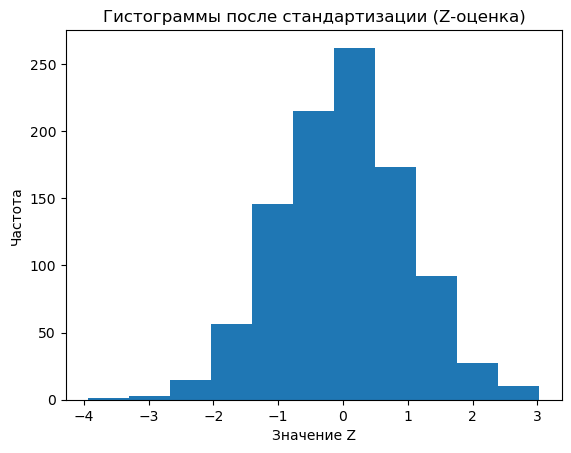

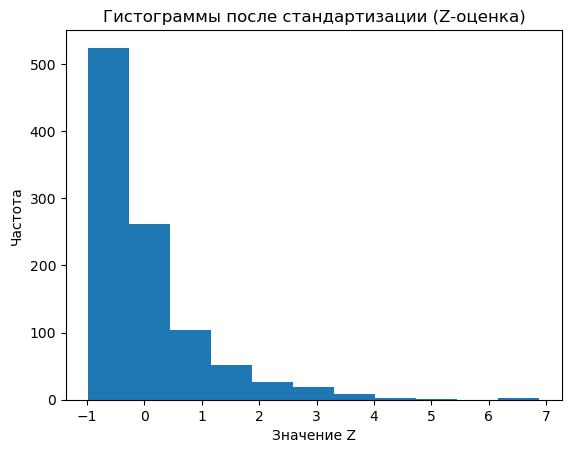

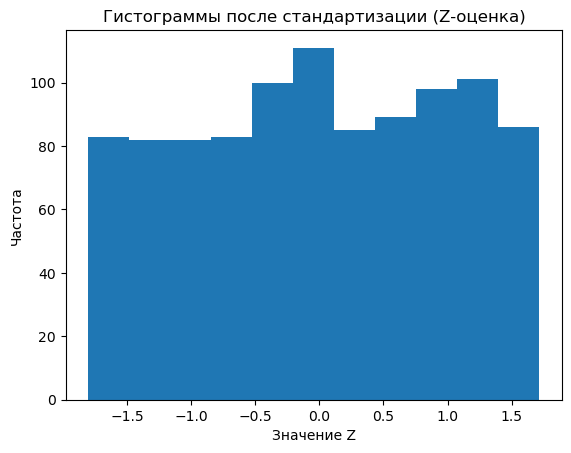

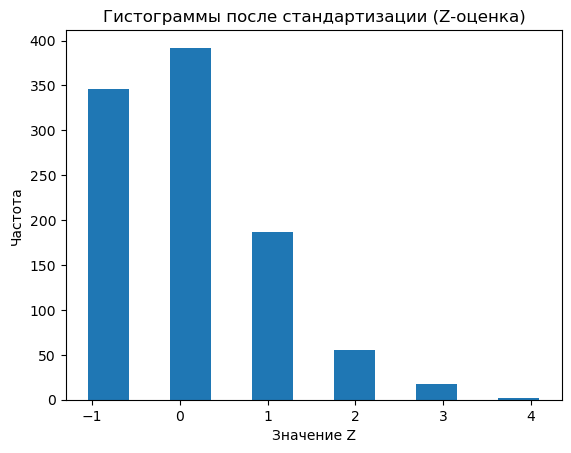

In [42]:
# Стандартизация каждой выборки
scaled_distributions = {
    'normal': (normal_distribution - np.mean(normal_distribution)) / np.std(normal_distribution),
    'exponential': (exponential_distribution - np.mean(exponential_distribution)) / np.std(exponential_distribution),
    'uniform': (uniform_distribution - np.mean(uniform_distribution)) / np.std(uniform_distribution),
    'poisson': (poisson_distribution - np.mean(poisson_distribution)) / np.std(poisson_distribution)
}
for distribution, data in scaled_distributions.items():
    plt.hist(data, bins=bins)
    plt.title('Гистограммы после стандартизации (Z-оценка)')
    plt.xlabel('Значение Z')
    plt.ylabel('Частота')
    plt.show()


### <center> 2.с MinMax масштабирование данных

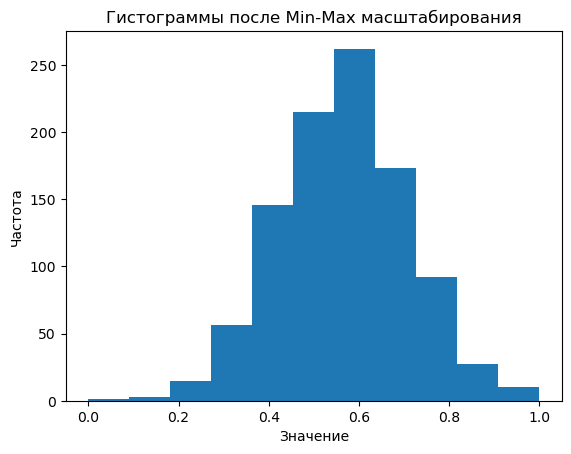

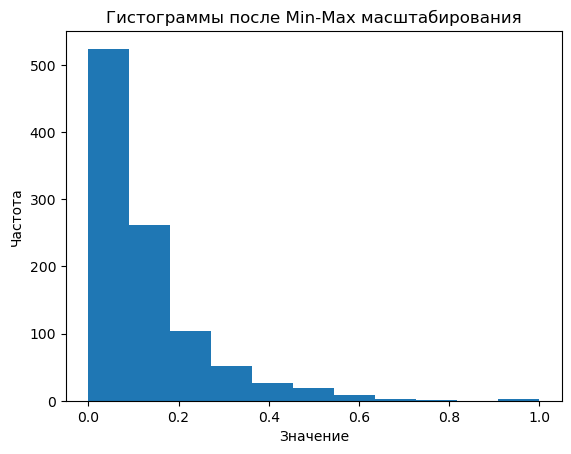

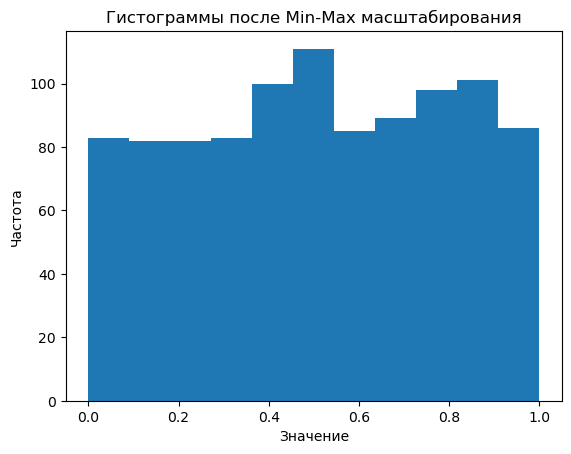

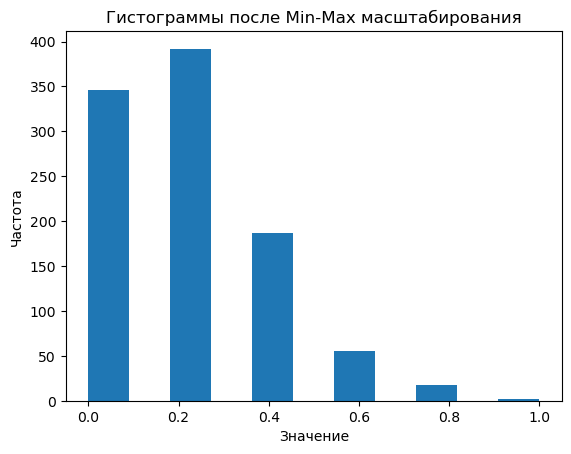

In [43]:
# Min-Max масштабирование для каждой выборки
scaled_distributions = {
    'normal': (normal_distribution - np.min(normal_distribution)) / (np.max(normal_distribution) - np.min(normal_distribution)),
    'exponential': (exponential_distribution - np.min(exponential_distribution)) / (np.max(exponential_distribution) - np.min(exponential_distribution)),
    'uniform': (uniform_distribution - np.min(uniform_distribution)) / (np.max(uniform_distribution) - np.min(uniform_distribution)),
    'poisson': (poisson_distribution - np.min(poisson_distribution)) / (np.max(poisson_distribution) - np.min(poisson_distribution))
}

# Построение гистограммы для масштабированных выборок
for distribution, data in scaled_distributions.items():
    plt.hist(data, bins=bins)
    plt.title('Гистограммы после Min-Max масштабирования')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.show()


# Задание 2

In [44]:
df = pd.read_csv('titanic.csv')

# Вывод первых 5 строк
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [48]:
df = df[['Age', 'Fare', 'Pclass', 'Sex', 'Embarked', 'Survived']]

# Вывод информации о количестве пропусков в каждом столбце
df.isnull().sum()

Age         177
Fare          0
Pclass        0
Sex           0
Embarked      2
Survived      0
dtype: int64

In [49]:
# Пропуски в столбце Age заполним его средним значением, 
# А в столбце Embarked заполним модой
df['Age'].fillna(df['Age'].mean(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.isnull().sum()

Age         0
Fare        0
Pclass      0
Sex         0
Embarked    0
Survived    0
dtype: int64

In [50]:
# Масштабирование на основе Z-оценки

# Вычисление среднего значения и стандартного отклонения для столбцов 'Age' и 'Fare'
mean_age = df['Age'].mean()
std_age = df['Age'].std()

mean_fare = df['Fare'].mean()
std_fare = df['Fare'].std()

# Применение стандартизации к столбцам 'Age' и 'Fare'
df['Age'] = (df['Age'] - mean_age) / std_age
df['Fare'] = (df['Fare'] - mean_fare) / std_fare


In [51]:
# OneHotEncoding

# Применение One-Hot Encoding к категориальным колонкам
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

df

,Age,Fare,Pclass,Survived,Sex_male,Embarked_Q,Embarked_S
0,-0.592148,-0.502163,3,0,True,False,True
1,0.638430,0.786404,1,1,False,False,False
2,-0.284503,-0.488580,3,1,False,False,True
3,0.407697,0.420494,1,1,False,False,True
4,0.407697,-0.486064,3,0,True,False,True
...,...,...,...,...,...,...,...
886,-0.207592,-0.386454,2,0,True,False,True
887,-0.822881,-0.044356,1,1,False,False,True
888,0.000000,-0.176164,3,0,False,False,True
889,-0.284503,-0.044356,1,1,True,False,False
